In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# from autoimpute 

In [3]:
data = pd.read_csv('listings.csv')
pd.set_option('max_columns',1000)
pd.set_option('max_rows',1000)
np.set_printoptions(threshold=np.inf)
pd.set_option('display.width', 1000)


In [4]:

data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18666,https://www.airbnb.com/rooms/18666,20190917034823,2019-09-17,Flat with Sunny Terrace,"Apartment located near the ""Plaza de las Glori...",Nice apartment situated on the penthouse floor...,"Apartment located near the ""Plaza de las Glori...",none,Apartment in Barcelona near to the Plaza de la...,NaN,"Good transports connections, 50 m from the met...",Free Wifi - air conditioning. We will provide ...,We can provide you all kind of entrance and ti...,Cleaning fee: 40 euros (to pay at arrival) Tou...,NaN,NaN,https://a0.muscache.com/im/pictures/47f88bc6-6...,NaN,71615,https://www.airbnb.com/users/show/71615,Mireia And Maria,2010-01-19,"Barcelona, Cataluña, Spain","We are Mireia (39) & Maria (41), two multiling...",within an hour,95%,NaN,f,https://a0.muscache.com/im/users/71615/profile...,https://a0.muscache.com/im/users/71615/profile...,El Camp de l'Arpa del Clot,47.0,47.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Barcelona, CT, Spain",Sant Martí,el Camp de l'Arpa del Clot,Sant Martí,Barcelona,CT,08026,Barcelona,"Barcelona, Spain",ES,Spain,41.40889,2.18555,t,Apartment,Entire home/apt,6,1.0,2.0,4.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Wheelcha...",75.0,$130.00,NaN,NaN,$150.00,$42.00,2,$25.00,3,730,3,3,730,730,3.0,730.0,3 weeks ago,t,0,0,0,251,2019-09-17,1,0,2015-10-10,2015-10-10,80.0,10.0,10.0,2.0,10.0,10.0,8.0,t,HUTB-003004,NaN,f,f,flexible,f,f,31,31,0,0,0.02
1,18674,https://www.airbnb.com/rooms/18674,20190917034823,2019-09-17,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment with 110 m2 located in the 6th floor...,110m2 apartment to rent in Barcelona. Located ...,none,Apartment in Barcelona located in the heart of...,NaN,"Good transport connection, 150 m from metro “...",Free Wifi - air conditioning. We will provide ...,We can provide you all kind of entrance and ti...,Tourist tax at arrival: 2.48 Eur/person/night ...,NaN,NaN,https://a0.muscache.com/im/pictures/13031453/4...,NaN,71615,https://www.airbnb.com/users/show/71615,Mireia And Maria,2010-01-19,"Barcelona, Cataluña, Spain","We are Mireia (39) & Maria (41), two multiling...",within an hour,95%,NaN,f,https://a0.muscache.com/im/users/71615/profile...,https://a0.muscache.com/im/use

In [5]:
drop = data.columns[(data.isnull().mean()*100) > 80] 
# Thesse are the columns which has Nan values more than 80 % of its data.
# These can be dropped 
drop

Index(['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate', 'square_feet', 'weekly_price', 'monthly_price', 'jurisdiction_names'], dtype='object')

In [6]:
# datreview_scores_accuracyev

In [7]:
data.isnull().mean() * 100

id                                                0.000000
listing_url                                       0.000000
scrape_id                                         0.000000
last_scraped                                      0.000000
name                                              0.073515
summary                                           5.606744
space                                            27.180945
description                                       2.465203
experiences_offered                               0.000000
neighborhood_overview                            34.498138
notes                                            53.229759
transit                                          40.050970
access                                           47.706332
interaction                                      43.447363
house_rules                                      33.380710
thumbnail_url                                   100.000000
medium_url                                      100.0000

In [8]:
data.drop(drop, 1 ,inplace = True)


In [9]:
df = data.iloc[:,22:]

In [10]:
df['listing_id'] = data['id']

In [11]:
# data.host_neighbourhood.value_counts()

In [12]:
# data.amenities.value_counts()

In [13]:
df.shape

(20404, 77)

In [14]:
data.room_type.value_counts()

Private room       10408
Entire home/apt     9063
Hotel room           776
Shared room          157
Name: room_type, dtype: int64

In [15]:
print(data.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'm

In [16]:
# co = data.columns.to_list()[:-1]
# ar = np.array(co)
# res = ar.reshape(5,21)
# pd.DataFrame(res).T.to_csv('feature_all.csv')

In [17]:
col_to_drop = ['host_thumbnail_url','host_picture_url','host_neighbourhood','street', 'neighbourhood', 
               'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 
               'smart_location', 'country_code', 'country', 'latitude', 'longitude','calendar_updated','calendar_last_scraped',
              'first_review','last_review','license']

In [18]:
df.drop(col_to_drop,axis = 1, inplace = True)

In [19]:
df.shape

(20404, 56)

In [20]:
df.head(3)

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id
0,within an hour,95%,f,47.0,47.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,t,Apartment,Entire home/apt,6,1.0,2.0,4.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Wheelcha...",$130.00,$150.00,$42.00,2,$25.00,3,730,3,3,730,730,3.0,730.0,t,0,0,0,251,1,0,80.0,10.0,10.0,2.0,10.0,10.0,8.0,t,f,f,flexible,f,f,31,31,0,0,0.02,18666
1,within an hour,95%,f,47.0,47.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,t,Apartment,Entire home/apt,8,2.0,3.0,6.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Wheelcha...",$60.00,$150.00,$50.00,2,$30.00,1,1125,1,5,1125,1125,1.9,1125.0,t,13,31,43,52,16,11,85.0,9.0,9.0,9.0,10.0,9.0,8.0,t,t,f,strict_14_with_grace_period,f,f,31,31,0,0,0.21,18674
2,within a few hours,100%,f,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",E...",$33.00,$100.00,NaN,1,$10.00,2,1125,2,4,1125,1125,2.1,1125.0,t,3,3,3,3,125,31,90.0,10.0,9.0,10.0,10.0,9.0,9.0,t,f,f,moderate,f,f,2,0,2,0,3.05,21605


In [21]:
df.host_response_time.value_counts()

within an hour        12246
within a few hours     3030
within a day           2329
a few days or more      269
Name: host_response_time, dtype: int64

In [22]:
data.host_name.value_counts()['Mireia And Maria']

31

In [23]:
# data.host_name.value_counts()['Meritell']

##### EDA

###### checking and imputing the null values

In [24]:
df.shape

(20404, 56)

In [26]:
[((df.isnull().mean() >= 0.001) & (df.isnull().mean() <= 0.3)).values]

[array([ True,  True,  True,  True,  True, False,  True,  True, False,
        False, False, False, False, False,  True, False, False, False,
         True,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True,  True,  True,  True,  True,  True,  True, False,
        False, False, False, False, False, False, False, False, False,
         True, False])]

In [27]:
null = pd.DataFrame()
pd.DataFrame({'name':df.isnull().sum().index,
              'bool':((df.isnull().mean() >= 0.001) & (df.isnull().mean() <= 0.3)).values,
              'percent':df.isnull().mean().values*100,
              'count': df.isnull().sum().values})

,name,bool,percent,count
0,host_response_time,True,12.399530,2530
1,host_response_rate,True,12.399530,2530
2,host_is_superhost,True,0.107822,22
3,host_listings_count,True,0.107822,22
4,host_total_listings_count,True,0.107822,22
5,host_verifications,False,0.000000,0
6,host_has_profile_pic,True,0.107822,22
7,host_identity_verified,True,0.107822,22
8,is_location_exact,False,0.000000,0
9,property_type,False,0.000000,0


In [417]:
df[df['host_is_superhost'].isna()].head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id
829,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,t,Apartment,Entire home/apt,4,1.0,2.0,3.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets allo...",$99.00,$400.00,$40.00,2,$15.00,1,1125,1,1,1125,1125,1.0,1125.0,t,4,18,48,316,71,28,89.0,9.0,9.0,10.0,10.0,9.0,9.0,t,t,f,moderate,f,f,12,12,0,0,0.98,1061343
831,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,t,Apartment,Entire home/apt,2,0.5,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",""...",$79.00,$500.00,$40.00,2,$10.00,1,1125,1,1,1125,1125,1.0,1125.0,t,1,3,25,294,76,20,87.0,9.0,9.0,10.0,10.0,9.0,8.0,t,t,f,strict_14_with_grace_period,f,f,12,12,0,0,1.08,1064956
1067,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,""Pets live on this property"",Dog...",$57.00,$100.00,$15.00,3,$20.00,30,60,30,30,60,60,30.0,60.0,t,28,58,88,363,18,0,93.0,9.0,9.0,10.0,10.0,10.0,10.0,t,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.24,1307947
1686,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,t,Apartment,Entire home/apt,4,1.0,2.0,3.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",$110.00,$500.00,$40.00,2,$10.00,1,1125,1,1,1125,1125,1.0,1125.0,t,3,3,3,171,54,23,92.0,9.0,9.0,9.0,10.0,9.0,9.0,t,t,f,strict_14_with_grace_period,f,f,12,12,0,0,0.80,2396459
1826,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,t,Apartment,Entire home/apt,4,1.0,2.0,3.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",$110.00,$400.00,$40.00,2,$10.00,1,1125,1,1,1125,1125,1.0,1125.0,t,0,0,0,214,59,11,87.0,9.0,9.0,9.0,9.0,9.0,8.0,t,t,f,strict_14_with_grace_period,f,f,12,12,0,0,1.07,2722884


In [418]:
dafa = df[~(df.host_is_superhost.isnull())]  # dropping the null values in the super host columns 

In [419]:
dafa.shape

(20382, 56)

In [420]:
# co = dafa.columns.to_list()
# ar = np.array(co)
# res = ar.reshape(5,11)
# pd.DataFrame(res).T.to_csv('feature_sele.csv')

In [421]:
dafa.columns = pd.to_numeric(dafa.columns, errors = 'ignore')

In [422]:
dafa.columns

Index(['host_response_time', 'host_response_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'requires_license', 'instant_bookable', 'is_business_travel_ready',
       'canc

In [423]:
bools_col = dafa[['host_has_profile_pic','host_identity_verified','host_is_superhost','is_location_exact','requires_license',
   'instant_bookable', 'is_business_travel_ready', 'require_guest_profile_picture','require_guest_phone_verification','has_availability']]

In [424]:
def bools(x):
    if x == 'f':
        return False
    elif x == 't':
        return True

In [425]:
for i in  bools_col.columns:
    dafa[i] = bools_col[i].apply(bools)

In [426]:
dafa.head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id
0,within an hour,95%,False,47.0,47.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",True,True,True,Apartment,Entire home/apt,6,1.0,2.0,4.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Wheelcha...",$130.00,$150.00,$42.00,2,$25.00,3,730,3,3,730,730,3.0,730.0,True,0,0,0,251,1,0,80.0,10.0,10.0,2.0,10.0,10.0,8.0,True,False,False,flexible,False,False,31,31,0,0,0.02,18666
1,within an hour,95%,False,47.0,47.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",True,True,True,Apartment,Entire home/apt,8,2.0,3.0,6.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Wheelcha...",$60.00,$150.00,$50.00,2,$30.00,1,1125,1,5,1125,1125,1.9,1125.0,True,13,31,43,52,16,11,85.0,9.0,9.0,9.0,10.0,9.0,8.0,True,True,False,strict_14_with_grace_period,False,False,31,31,0,0,0.21,18674
2,within a few hours,100%,False,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",True,True,True,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",E...",$33.00,$100.00,NaN,1,$10.00,2,1125,2,4,1125,1125,2.1,1125.0,True,3,3,3,3,125,31,90.0,10.0,9.0,10.0,10.0,9.0,9.0,True,False,False,moderate,False,False,2,0,2,0,3.05,21605
3,within an hour,100%,True,5.0,5.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",True,True,False,Apartment,Entire home/apt,6,2.0,3.0,5.0,Real Bed,"{TV,Internet,Wifi,""Wheelchair accessible"",Kitc...",$210.00,$300.00,$80.00,3,$10.00,3,1125,3,5,1125,1125,3.1,1125.0,True,10,33,56,326,49,17,94.0,10.0,10.0,10.0,10.0,9.0,9.0,True,True,False,strict_14_with_grace_period,False,True,2,2,0,0,0.47,23197
4,within an hour,100%,True,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",True,True,True,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Smoking a...",$45.00,NaN,NaN,1,$25.00,1,730,1,1,730,730,1.0,730.0,True,10,31,41,77,254,48,95.0,10.0,10.0,10.0,10.0,10.0,10.0,True,True,False,strict_14_with_grace_period,True,True,1,0,1,0,2.29,25786


In [427]:
amenities_df = dafa.copy() 

In [428]:
for i in ['host_verifications','amenities']:
    dafa[i] = dafa[i].apply(lambda x : len(x.split(',')))
# converting the values from list to count of values in the index

In [429]:
#Create a function to get ammenities

def get_amenities(column):
    am_list=[]
    for am in column:
        am=am.replace('"','')
        am=am.replace('{','')
        am=am.replace('}','')
        am_list += am.split(',')

    #am_list=am_list.remove('translation missing: en.hosting_amenity_50')    
    #am_list=am_list.remove('translation missing: en.hosting_amenity_49')
    
    am_list2=pd.DataFrame(am_list) #Transform list into a data frame

    am_list2.rename(columns={0:'amenities'},inplace=True) #replace name to categories

    am_list2=am_list2.groupby('amenities')['amenities'].count().sort_values(ascending=False) #group by category and count.
    am_list2.rename(columns={'amenities':'count'},inplace=True) #Rename column to count to then drop one level
    am_list2.reset_index(level=0)
    return am_list2

In [430]:
#Get amenities

amenities=get_amenities(amenities_df.amenities) #Total

amenities = amenities.drop(['translation missing: en.hosting_amenity_50'],axis=0)

amenities = amenities.drop(['translation missing: en.hosting_amenity_49'],axis=0)

amenities

amenities/amenities.sum()*100 #Percentage of total tags

(amenities/amenities.sum()*100).sum()

amenities#[0:200]

amenities
Wifi                                19893
Essentials                          19085
Kitchen                             17811
Hangers                             16572
Hair dryer                          15754
Washer                              15488
Heating                             15350
Iron                                14805
TV                                  14130
Shampoo                             12918
Hot water                           12630
Elevator                            12264
Air conditioning                    11861
Laptop friendly workspace           11302
Refrigerator                         9087
Dishes and silverware                8580
Bed linens                           8171
Microwave                            8123
Host greets you                      7629
Coffee maker                         7616
Cooking basics                       7238
Family/kid friendly                  7097
Oven                                 6853
No stairs or steps to en

In [431]:
# sns.pairplot(dafa)

In [432]:
dafa.head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id
0,within an hour,95%,False,47.0,47.0,5,True,True,True,Apartment,Entire home/apt,6,1.0,2.0,4.0,Real Bed,18,$130.00,$150.00,$42.00,2,$25.00,3,730,3,3,730,730,3.0,730.0,True,0,0,0,251,1,0,80.0,10.0,10.0,2.0,10.0,10.0,8.0,True,False,False,flexible,False,False,31,31,0,0,0.02,18666
1,within an hour,95%,False,47.0,47.0,5,True,True,True,Apartment,Entire home/apt,8,2.0,3.0,6.0,Real Bed,22,$60.00,$150.00,$50.00,2,$30.00,1,1125,1,5,1125,1125,1.9,1125.0,True,13,31,43,52,16,11,85.0,9.0,9.0,9.0,10.0,9.0,8.0,True,True,False,strict_14_with_grace_period,False,False,31,31,0,0,0.21,18674
2,within a few hours,100%,False,2.0,2.0,6,True,True,True,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,41,$33.00,$100.00,NaN,1,$10.00,2,1125,2,4,1125,1125,2.1,1125.0,True,3,3,3,3,125,31,90.0,10.0,9.0,10.0,10.0,9.0,9.0,True,False,False,moderate,False,False,2,0,2,0,3.05,21605
3,within an hour,100%,True,5.0,5.0,8,True,True,False,Apartment,Entire home/apt,6,2.0,3.0,5.0,Real Bed,46,$210.00,$300.00,$80.00,3,$10.00,3,1125,3,5,1125,1125,3.1,1125.0,True,10,33,56,326,49,17,94.0,10.0,10.0,10.0,10.0,9.0,9.0,True,True,False,strict_14_with_grace_period,False,True,2,2,0,0,0.47,23197
4,within an hour,100%,True,1.0,1.0,8,True,True,True,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,17,$45.00,NaN,NaN,1,$25.00,1,730,1,1,730,730,1.0,730.0,True,10,31,41,77,254,48,95.0,10.0,10.0,10.0,10.0,10.0,10.0,True,True,False,strict_14_with_grace_period,True,True,1,0,1,0,2.29,25786


In [433]:
null_df = dafa.copy()

In [434]:
dafa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20382 entries, 0 to 20403
Data columns (total 56 columns):
host_response_time                              17874 non-null object
host_response_rate                              17874 non-null object
host_is_superhost                               20382 non-null bool
host_listings_count                             20382 non-null float64
host_total_listings_count                       20382 non-null float64
host_verifications                              20382 non-null int64
host_has_profile_pic                            20382 non-null bool
host_identity_verified                          20382 non-null bool
is_location_exact                               20382 non-null bool
property_type                                   20382 non-null object
room_type                                       20382 non-null object
accommodates                                    20382 non-null int64
bathrooms                                       20375 non-n

In [435]:
# Let us check the significance of each feature with respect to target price

In [436]:
null_df['add'] = null_df['calculated_host_listings_count_shared_rooms'] + null_df['calculated_host_listings_count_private_rooms'] + null_df['calculated_host_listings_count_entire_homes']

In [437]:
(null_df['add'] == null_df['calculated_host_listings_count']).value_counts()

True     19171
False     1211
dtype: int64

In [438]:
dafa.room_type.value_counts()

Private room       10401
Entire home/apt     9048
Hotel room           776
Shared room          157
Name: room_type, dtype: int64

In [439]:
1211/(19171+1211)

0.059415170248258264

In [440]:
null_df.isna().sum().sum()

51420

###### converting categorical features to numerical

In [441]:
da = dafa.copy()

In [442]:
dafa.host_response_rate = dafa.host_response_rate.str.replace('%','').astype(float)
dafa.security_deposit = dafa.security_deposit.str.replace('$','')
dafa.security_deposit = dafa.security_deposit.str.replace(',','')

dafa.cleaning_fee = dafa.cleaning_fee.str.replace('$','').astype(float)
dafa.extra_people = dafa.extra_people.str.replace('$','').astype(float)

dafa.price = dafa.price.str.replace('$','')
dafa.price = dafa.price.str.replace(',','')


In [443]:
from sklearn.preprocessing import LabelEncoder

In [444]:
col_label = ['host_response_time','property_type','room_type','bed_type','cancellation_policy']

In [445]:
for i in dafa.columns:
    dafa[i] = pd.to_numeric(dafa[i], errors = 'ignore')

In [446]:
dafa[col_label].isnull().sum()

host_response_time     2508
property_type             0
room_type                 0
bed_type                  0
cancellation_policy       0
dtype: int64

In [447]:
pd.crosstab(da['host_is_superhost'],da['host_response_time'])

host_response_time,a few days or more,within a day,within a few hours,within an hour
host_is_superhost,,,,
False,267,2157,2355,9566
True,2,172,675,2680


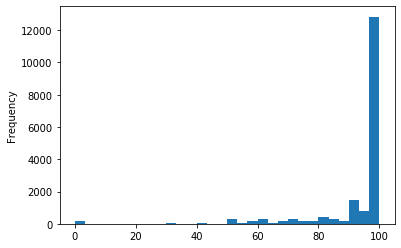

In [448]:
dafa.host_response_rate.plot(kind = 'hist',bins = 30)

In [449]:
dafa.host_listings_count

0        47.0
1        47.0
2         2.0
3         5.0
4         1.0
         ... 
20399     0.0
20400     3.0
20401     0.0
20402     0.0
20403     0.0
Name: host_listings_count, Length: 20382, dtype: float64

In [450]:
dafa.has_availability.value_counts()

True    20382
Name: has_availability, dtype: int64

In [451]:
dafa.is_business_travel_ready.value_counts()

False    20382
Name: is_business_travel_ready, dtype: int64

In [452]:
dafa.requires_license.value_counts()

True    20382
Name: requires_license, dtype: int64

In [453]:
dafa.drop(['has_availability','is_business_travel_ready','requires_license'],1,inplace = True)

##### Object type columns:

In [454]:
col_label = ['host_response_time', 'property_type', 'room_type', 'bed_type', 'beds','bathrooms','bedrooms',
 'cancellation_policy']

In [455]:
dafa[col_label] = dafa[col_label].astype(object)

###### FIlling missing values using iterative imputer

In [456]:
# from fancyimpute import MICE
# #We use the dafa dataframe that feature selected.
# #fancy impute removes column names.
# dafa_list = list(dafa)
# # Use MICE to fill in each row's missing features
# dafa = pd.DataFrame(MICE(verbose=False).complete(dafa))
# dafa.columns = dafa_list

In [457]:
# dafa[dafa.review_scores_accuracy.isna()]

In [458]:
# dafa.drop('listing_id',1,inplace = True)

In [459]:
missing_values = dafa.columns[dafa.isnull().sum()>0]

In [460]:
from sklearn.experimental import enable_iterative_imputer
# Now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

from sklearn.neighbors import KNeighborsRegressor

In [461]:
# Subset numeric features: numeric_cols
numeric_cols = dafa.select_dtypes(include = ['int64','float64'])

# Iteratively impute
imp_iter = IterativeImputer(max_iter=5, sample_posterior=True, random_state=123)
dafa_imp_iter = imp_iter.fit_transform(numeric_cols)

# Convert returned array to DataFrame
dafa_imp_iterDF = pd.DataFrame(dafa_imp_iter, columns=numeric_cols.columns)

# Check the DataFrame's info
print(dafa_imp_iterDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20382 entries, 0 to 20381
Data columns (total 38 columns):
host_response_rate                              20382 non-null float64
host_listings_count                             20382 non-null float64
host_total_listings_count                       20382 non-null float64
host_verifications                              20382 non-null float64
accommodates                                    20382 non-null float64
amenities                                       20382 non-null float64
price                                           20382 non-null float64
security_deposit                                20382 non-null float64
cleaning_fee                                    20382 non-null float64
guests_included                                 20382 non-null float64
extra_people                                    20382 non-null float64
minimum_nights                                  20382 non-null float64
maximum_nights                         

In [462]:
len(dafa_imp_iterDF.isnull().sum())

38

In [463]:
dafa[dafa_imp_iterDF.columns] = dafa_imp_iterDF

In [464]:
# ## Fill missing values in Age feature with each sex’s mean value of ## Age 
# dafa.host_response_time.fillna(dafa.groupby('host_is_superhost')['host_response_time'].transform("mean"), inplace=True)

In [465]:
for i in col_label:
    dafa[i] = dafa[i].fillna(dafa[i].mode()[0])

In [466]:
dafa.isnull().sum().sum()

836

In [467]:
# dafa_imp_iterDF

In [468]:
dafa.shape

(20382, 53)

In [469]:
dafa.dropna(inplace = True)

In [470]:
dafa.shape

(20360, 53)

In [376]:
# dafa.isnull().sum()

In [377]:
# dafa.info()

In [378]:
check_host_count = data['host_listings_count']

###### EDA

In [379]:
cols_dist = dafa.select_dtypes(exclude = ['object','bool']).columns.to_list()

In [380]:
# fig = plt.figure(figsize=(50,80))
# fig.subplots_adjust(hspace=2, wspace=0.4)

# for i,j in enumerate(cols_dist):
#     plt.title(j)
#     plt.subplot(14,4, i+1)
#     plt.hist(dafa[j], bins = 20 )
    

In [381]:
# plt.figure(figsize=(50,80))
# fig.subplots_adjust(hspace=10, wspace=0.4)

# for i,j in enumerate(cols_dist):
#     plt.title(j)
#     plt.subplot(14,4, i+1)
#     sns.distplot(dafa[j])
    

In [382]:
# The price is right skewed


In [383]:
dafa.price.skew()

12.264027705930522

In [384]:
q1 = dafa.price.quantile(0.25)
q3 = dafa.price.quantile(0.75)

iqr = q3-q1

ho = q3 + 1.5* iqr
lo = q1 - 1.5 * iqr

dafa_in = dafa[(~(dafa.price < lo) | (dafa.price > ho))]
dafa_in.shape

(20360, 52)

In [385]:
q1

39.0

In [386]:
q3

109.0

In [387]:
dafa_out = dafa[(dafa.price < lo) | (dafa.price > ho)]
dafa_out.shape

(1640, 52)

In [388]:
# There are 1640 outlier but all the values are scraped from the listings and thus it need not be removed

###### Label Encoding

In [389]:
col_label

['host_response_time',
 'property_type',
 'room_type',
 'bed_type',
 'beds',
 'bathrooms',
 'bedrooms',
 'cancellation_policy']

In [390]:
da = dafa.copy()
de = dafa_in.copy()

In [294]:
le = LabelEncoder()

for i in col_label:
    da[i] = le.fit_transform(da[i])


TypeError: argument must be a string or number


###### outliers removed base model

In [ ]:
import statsmodels.api as sm

In [292]:
X_in, y_in = da.drop(['price','listing_id'],1),np.log(dafa_in.price)

In [293]:
X_cons = sm.add_constant(X_in)
model = sm.OLS(y_in, X_cons.astype(float)).fit()
model.summary()

ValueError: could not convert string to float: 'within an hour'

In [182]:
# # using the vif method we can remove multicollinearity
# X = da.drop(['price','log_price'],1)

# from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif = [variance_inflation_factor(X.values, i) for i in range(0, X.shape[1])]

In [183]:
# # removing collinear variables
# # function definition

# def calculate_vif(x):
#     thresh = 2.0
#     output = pd.DataFrame()
#     k = x.shape[1]
#     vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
#     for i in range(1,k):
#         a = np.argmax(vif)
#         print("REMOVED MAX VIF AND INDEX.:")
#         print(a,'-', np.max(vif))
#         if vif[a] <= thresh :
#             break
#         if i == 1 :          
#             output = x.drop(x.columns[a], axis = 1)
#             vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
#         elif i > 1 :
#             output = output.drop(output.columns[a],axis = 1)
#             vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
#     return(output)

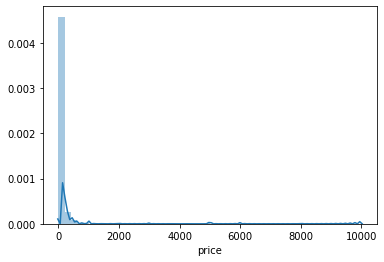

In [184]:
sns.distplot(de['price'])

###### statistical 

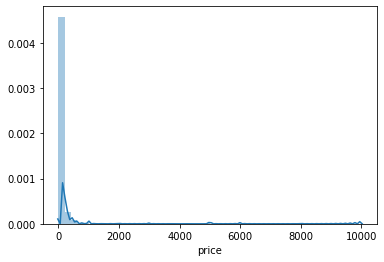

In [185]:
sns.distplot(da['price'])

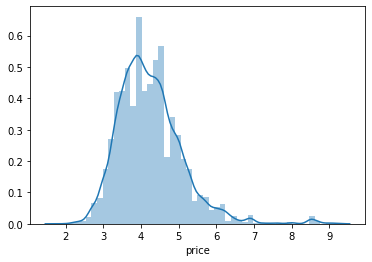

In [186]:
sns.distplot(np.log(de['price']))

In [187]:
import scipy.stats as stats

In [188]:
print('Mean',np.mean(np.log(da.price)))
print('Median',np.median(np.log(da.price)))
print('Std',np.std(np.log(da.price)))
print('mode',stats.mode(np.log(da.price))[0][0])


Mean 4.2414907275959655
Median 4.110873864173311
Std 0.8586434129788301
mode 3.912023005428146


We can see the mean, median, mode are near to each other. Therefore, it follows normal distribution.

In [189]:
da['log_price'] = np.log(da['price'])

In [190]:
# There fore the logging of the price make it fit for normal distribution
# Now it can used for checking statistical signifance

In [191]:
da.head(3)

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price
0,3,95.0,False,47.0,47.0,5.0,True,True,True,1,0,6.0,2,2,4,4,18.0,130.0,150.0,42.000000,2.0,25.0,3.0,730.0,3.0,3.0,730.0,730.0,3.0,730.0,0.0,0.0,0.0,251.0,1.0,0.0,80.0,10.0,10.0,2.0,10.0,10.0,8.0,False,0,False,False,31.0,31.0,0.0,0.0,0.02,4.867534
1,3,95.0,False,47.0,47.0,5.0,True,True,True,1,0,8.0,4,3,6,4,22.0,60.0,150.0,50.000000,2.0,30.0,1.0,1125.0,1.0,5.0,1125.0,1125.0,1.9,1125.0,13.0,31.0,43.0,52.0,16.0,11.0,85.0,9.0,9.0,9.0,10.0,9.0,8.0,True,3,False,False,31.0,31.0,0.0,0.0,0.21,4.094345
2,2,100.0,False,2.0,2.0,6.0,True,True,True,1,2,2.0,2,1,1,4,41.0,33.0,100.0,89.731275,1.0,10.0,2.0,1125.0,2.0,4.0,1125.0,1125.0,2.1,1125.0,3.0,3.0,3.0,3.0,125.0,31.0,90.0,10.0,9.0,10.0,10.0,9.0,9.0,False,1,False,False,2.0,0.0,2.0,0.0,3.05,3.496508


In [192]:
rounding_categorical = ['bathrooms','beds','bedrooms']

In [193]:
da

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price
0,3,95.000000,False,47.0,47.0,5.0,True,True,True,1,0,6.0,2,2,4,4,18.0,130.0,150.000000,42.000000,2.0,25.0,3.0,730.0,3.0,3.0,730.0,730.0,3.0,730.0,0.0,0.0,0.0,251.0,1.0,0.0,80.000000,10.000000,10.000000,2.000000,10.000000,10.000000,8.000000,False,0,False,False,31.0,31.0,0.0,0.0,0.020000,4.867534
1,3,95.000000,False,47.0,47.0,5.0,True,True,True,1,0,8.0,4,3,6,4,22.0,60.0,150.000000,50.000000,2.0,30.0,1.0,1125.0,1.0,5.0,1125.0,1125.0,1.9,1125.0,13.0,31.0,43.0,52.0,16.0,11.0,85.000000,9.000000,9.000000,9.000000,10.000000,9.000000,8.000000,True,3,False,False,31.0,31.0,0.0,0.0,0.210000,4.094345
2,2,100.000000,False,2.0,2.0,6.0,True,True,True,1,2,2.0,2,1,1,4,41.0,33.0,100.000000,89.731275,1.0,10.0,2.0,1125.0,2.0,4.0,1125.0,1125.0,2.1,1125.0,3.0,3.0,3.0,3.0,125.0,31.0,90.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,False,1,False,False,2.0,0.0,2.0,0.0,3.050000,3.496508
3,3,100.000000,True,5.0,5.0,8.0,True,True,False,1,0,6.0,4,3,5,4,46.0,210.0,300.000000,80.000000,3.0,10.0,3.0,1125.0,3.0,5.0,1125.0,1125.0,3.1,1125.0,10.0,33.0,56.0,326.0,49.0,17.0,94.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000,True,3,False,True,2.0,2.0,0.0,0.0,0.470000,5.347108
4,3,100.000000,True,1.0,1.0,8.0,True,True,True,1,2,2.0,2,1,1,4,17.0,45.0,1002.312357,-9.750764,1.0,25.0,1.0,730.0,1.0,1.0,730.0,730.0,1.0,730.0,10.0,31.0,41.0,77.0,254.0,48.0,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,True,3,True,True,1.0,0.0,1.0,0.0,2.290000,3.806662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20355,3,90.592497,False,0.0,0.0,2.0,True,False,True,1,2,2.0,2,1,1,4,11.0,38.0,0.000000,49.000000,1.0,0.0,2.0,7.0,2.0,2.0,7.0,7.0,2.0,7.0,23.0,53.0,83.0,83.0,0.0,0.0,97.050998,10.054429,10.478618,10.293234,10.357489,9.739304,9.510317,True,0,False,False,1.0,0.0,1.0,0.0,0.612052,3.637586
20356,3,100.000000,False,3.0,3.0,7.0,True,False,True,1,0,1.0,2,1,1,4,5.0,23.0,150.000000,60.000000,1.0,0.0,30.0,1125.0,30.0,30.0,1125.0,1125.0,30.0,1125.0,30.0,60.0,90.0,180.0,0.0,0.0,97.942052,8.700872,9.157881,10.553643,9.632060,9.232370,9.005462,True,1,False,False,3.0,0.0,3.0,0.0,1.544734,3.135494
20357,3,110.647568,False,0.0,0.0,1.0,True,False,True,1,2,2.0,4,1,1,4,2.0,40.0,30.604495,-0.799989,1.0,0.0,3.0,1125.0,3.0,3.0,1125.0,1125.0,3.0,1125.0,6.0,36.0,66.0,341.0,0.0,0.0,98.205307,9.938402,9.152450,9.085446,10.656412,9.442003,9.754071,True,3,False,False,1.0,0.0,1.0,0.0,2.621104,3.688879
20358,3,85.979495,False,0.0,0.0,2.0,True,False,True,21,0,2.0,2,1,1,4,11.0,40.0,0.000000,10.000000,1.0,15.0,2.0,3.0,2.0,2.0,3.0,3.0,2.0,3.0,8.0,15.0,29.0,128.0,0.0,0.0,98.564735,10.235070,9.043385,10.506240,10.020142,9.523879,9.353062,True,0,False,False,1.0,0.0,1.0,0.0,0.575609,3.688879


In [473]:
da.to_csv('listings_new_.csv')

###### host response time dependent with price

In [147]:
host_res_time = da[['host_response_time','log_price']]
host_res_time.head(2)

,host_response_time,log_price
0,3,4.867534
1,3,4.094345


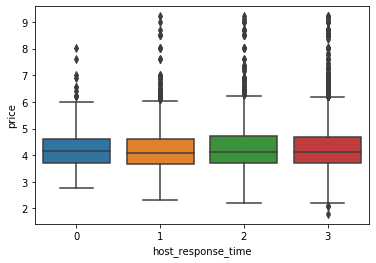

In [272]:
# boxplot
sns.boxplot(de['host_response_time'],np.log(da['price']))

In [273]:
# The mean looks similar check statistically

The means are not same,The host response time affect the price or not .

Hypothesis-

H0 - mean1 = mean2 = mean3 = mean4

Ha - not all the means are same

In [274]:
import statsmodels.api as sm
import   statsmodels.formula.api as smf
 
mod = smf.ols('log_price ~ host_response_time', data = da).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                          sum_sq       df         F   PR(>F)
host_response_time      2.167289      3.0  0.980172  0.40091
Residual            15003.258373  20356.0       NaN      NaN


Pvalue is 0.27 greater than 0.05 therefore the mean are same i.e the host reponse time  doesn't affect the pricing of the house

###### Is it true super host can earn more?

In [275]:
is_sup_host = da[da.host_is_superhost == True]['log_price'].to_list()
isnot_sup_host = da[da.host_is_superhost == False]['log_price'].to_list()

In [276]:
# sns.countplot()

No handles with labels found to put in legend.


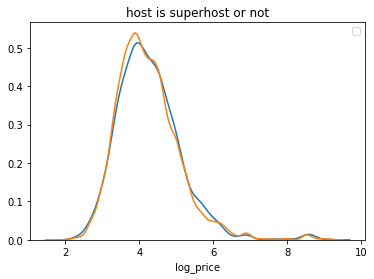

In [277]:
plt.title('host is superhost or not')

sns.distplot(da[da['host_is_superhost'] == True]['log_price'],bins=30, hist = False)
# plt.title('host is not a superhost')
plt.xlabel('log_price')
sns.distplot(da[da['host_is_superhost'] == False]['log_price'],bins=30, hist = False)
plt.legend()

In [278]:
print(np.mean(da[da['host_is_superhost'] == False]['log_price']), 
      np.median(da[da['host_is_superhost'] == False]['log_price']),
      np.std(da[da['host_is_superhost'] == False]['log_price']))
print(np.mean(da[da['host_is_superhost'] == True]['log_price'])
      ,np.median(da[da['host_is_superhost'] == True]['log_price']),
      np.std(da[da['host_is_superhost'] == True]['log_price']))

4.235618412300582 4.0943445622221 0.8560379075691305
4.268949373458159 4.174387269895637 0.8692330737455285


In [279]:
t_statistic, p_value  =  stats.ttest_ind(is_sup_host,isnot_sup_host)
print('P Value ',p_value)
print('T statistics ',t_statistic)

P Value  0.03426117866388716
T statistics  2.1171268337911653


In [280]:
n1 = len(is_sup_host)
n2 = len(isnot_sup_host)
alpha = 0.05
tcr = stats.t.ppf(alpha/2,n1+n2-2)   
tcr

-1.9600805190660235

Yes, as we can see we can reject null hypothesis thus we can know the super host status is important for the host.

###### Average salary of superhost

In [281]:
# is_sup_host

###### Does the property and price are significanly dependent?

In [282]:
prop_time = da[['property_type','log_price']]
prop_time.head(2)

,property_type,log_price
0,Apartment,4.867534
1,Apartment,4.094345


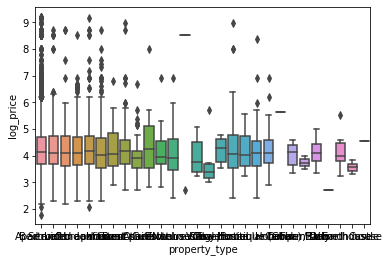

In [283]:
# boxplot
sns.boxplot(da['property_type'],da['log_price'])

In [284]:
import statsmodels.api         as     sm
import   statsmodels.formula.api as smf
 
mod = smf.ols('log_price ~ property_type', data = da).fit()
aov_table = sm.stats.anova_lm(mod, typ=1)
print(aov_table)

                    df        sum_sq   mean_sq         F        PR(>F)
property_type     27.0    122.933675  4.553099  6.220303  3.364362e-22
Residual       20332.0  14882.491986  0.731974       NaN           NaN


Thus the property type doesn't affect price.
MAy be The bedtype and space affect the price

###### how property type room type to price statistically


In [285]:
dafa.room_type.value_counts()

Private room       10389
Entire home/apt     9039
Hotel room           776
Shared room          156
Name: room_type, dtype: int64

In [286]:
room_type = da[['room_type','price']]
room_type.head(2)

,room_type,price
0,Entire home/apt,130.0
1,Entire home/apt,60.0


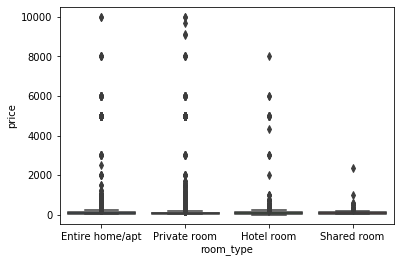

In [287]:
# boxplot
sns.boxplot(da['room_type'],da['price'])

In [288]:
mod = smf.ols('price ~ room_type', data = da).fit()
aov_table = sm.stats.anova_lm(mod, typ=1)
print(aov_table)

                df        sum_sq       mean_sq         F    PR(>F)
room_type      3.0  3.492342e+06  1.164114e+06  5.221676  0.001332
Residual   20356.0  4.538141e+09  2.229388e+05       NaN       NaN


In [289]:
dafa.room_type.value_counts()

Private room       10389
Entire home/apt     9039
Hotel room           776
Shared room          156
Name: room_type, dtype: int64

In [290]:
# Thus the room type does play a role in setting of price . 
# As we know there will be a price difference between private and shared room

###### Top host

In [291]:
top_host = pd.DataFrame()

In [292]:
top_host['name'] = data['host_name']

In [293]:
top_host['price'] = dafa['price']

In [294]:
top_host.dropna(inplace = True)

In [295]:
top_host.shape

(20360, 2)

In [296]:
earning = top_host.groupby('name').price.sum().sort_values(ascending = False).head(20)
# earning

<BarContainer object of 20 artists>

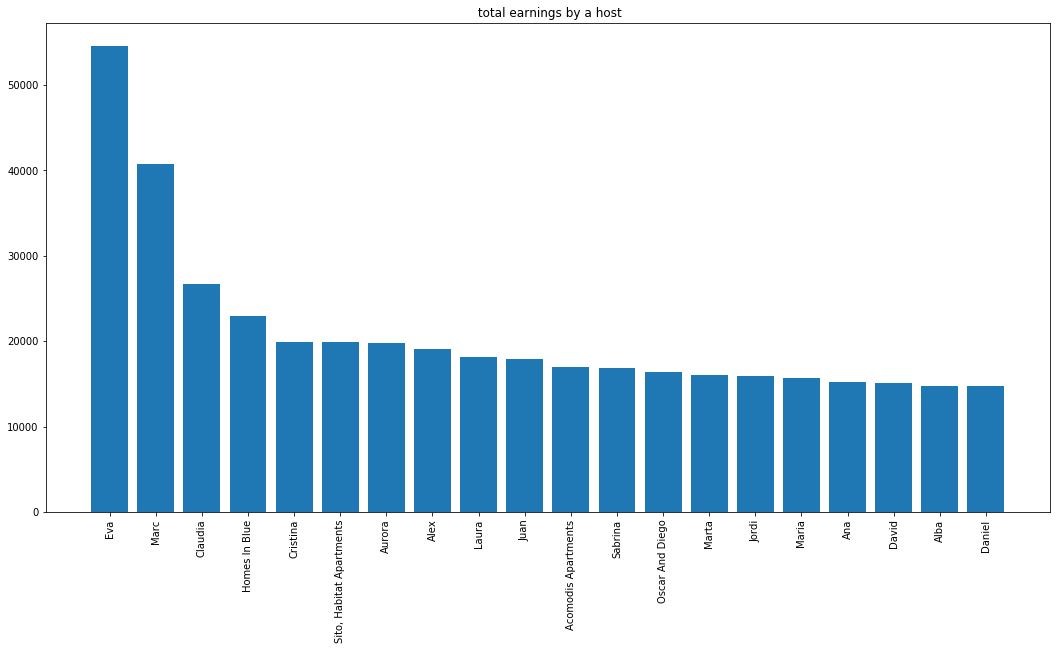

In [297]:
plt.figure(figsize = (18,9))
plt.title(' total earnings by a host')
plt.xticks(rotation = 'vertical')
plt.bar(earning.index,earning.values)


###### Base model:

In [304]:
da

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price
0,within an hour,95.000000,False,47.0,47.0,5.0,True,True,True,Apartment,Entire home/apt,6.0,1.0,2.0,4.0,Real Bed,18.0,130.0,150.000000,42.000000,2.0,25.0,3.0,730.0,3.0,3.0,730.0,730.0,3.0,730.0,0.0,0.0,0.0,251.0,1.0,0.0,80.000000,10.000000,10.000000,2.000000,10.000000,10.000000,8.000000,False,flexible,False,False,31.0,31.0,0.0,0.0,0.020000,4.867534
1,within an hour,95.000000,False,47.0,47.0,5.0,True,True,True,Apartment,Entire home/apt,8.0,2.0,3.0,6.0,Real Bed,22.0,60.0,150.000000,50.000000,2.0,30.0,1.0,1125.0,1.0,5.0,1125.0,1125.0,1.9,1125.0,13.0,31.0,43.0,52.0,16.0,11.0,85.000000,9.000000,9.000000,9.000000,10.000000,9.000000,8.000000,True,strict_14_with_grace_period,False,False,31.0,31.0,0.0,0.0,0.210000,4.094345
2,within a few hours,100.000000,False,2.0,2.0,6.0,True,True,True,Apartment,Private room,2.0,1.0,1.0,1.0,Real Bed,41.0,33.0,100.000000,89.922336,1.0,10.0,2.0,1125.0,2.0,4.0,1125.0,1125.0,2.1,1125.0,3.0,3.0,3.0,3.0,125.0,31.0,90.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,False,moderate,False,False,2.0,0.0,2.0,0.0,3.050000,3.496508
3,within an hour,100.000000,True,5.0,5.0,8.0,True,True,False,Apartment,Entire home/apt,6.0,2.0,3.0,5.0,Real Bed,46.0,210.0,300.000000,80.000000,3.0,10.0,3.0,1125.0,3.0,5.0,1125.0,1125.0,3.1,1125.0,10.0,33.0,56.0,326.0,49.0,17.0,94.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000,True,strict_14_with_grace_period,False,True,2.0,2.0,0.0,0.0,0.470000,5.347108
4,within an hour,100.000000,True,1.0,1.0,8.0,True,True,True,Apartment,Private room,2.0,1.0,1.0,1.0,Real Bed,17.0,45.0,991.363756,-10.009156,1.0,25.0,1.0,730.0,1.0,1.0,730.0,730.0,1.0,730.0,10.0,31.0,41.0,77.0,254.0,48.0,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,True,strict_14_with_grace_period,True,True,1.0,0.0,1.0,0.0,2.290000,3.806662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20377,within an hour,89.190700,False,0.0,0.0,2.0,True,False,True,Apartment,Private room,2.0,1.0,1.0,1.0,Real Bed,11.0,38.0,0.000000,49.000000,1.0,0.0,2.0,7.0,2.0,2.0,7.0,7.0,2.0,7.0,23.0,53.0,83.0,83.0,0.0,0.0,97.223221,10.080517,10.493282,10.331523,10.392517,9.723140,9.542394,False,flexible,False,False,1.0,0.0,1.0,0.0,-0.208768,3.637586
20378,within an hour,100.000000,False,3.0,3.0,7.0,True,True,False,Apartment,Private room,1.0,1.0,1.0,1.0,Real Bed,5.0,23.0,150.000000,60.000000,1.0,0.0,30.0,1125.0,30.0,30.0,1125.0,1125.0,30.0,1125.0,30.0,60.0,90.0,180.0,0.0,0.0,98.096739,8.731872,9.176731,10.602408,9.682970,9.194030,9.043110,True,flexible,False,False,3.0,0.0,3.0,0.0,0.751288,3.135494
20379,within an hour,110.267575,False,0.0,0.0,1.0,True,False,True,House,Private room,2.0,2.0,1.0,1.0,Real Bed,2.0,40.0,24.472994,0.054184,1.0,0.0,3.0,1125.0,3.0,3.0,1125.0,1125.0,3.0,1125.0,6.0,36.0,66.0,341.0,0.0,0.

In [313]:
X,y = da.drop(['price','log_price'],1), np.log(da.price)

In [314]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [316]:
import statsmodels.api as sm

In [317]:
X_cons = sm.add_constant(X)
model = sm.OLS(y, X_cons.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     333.7
Date:                Sat, 16 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:37:42   Log-Likelihood:                -19678.
No. Observations:               20360   AIC:                         3.946e+04
Df Residuals:                   20309   BIC:                         3.986e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            3.1529      0.197     15.998      0.000       2.767       3.539
host_response_time                              -0.0009      0.006     -0.143      0.886      -0.014       0.012
host_response_rate                               0.0006      0.000      1.811      0.070   -4.86e-05       0.001
host_is_superhost                                0.0137      0.012      1.139      0.255      -0.010       0.037
host_listings_count                             -0.0007   7.51e-05     -8.875      0.000      -0.001      -0.001
host_total_listings_count                       -0.0007   7.51e-05     -8.875      0.000      -0.001      -0.001
host_verifications                              -0.0225      0.002    -10.394      0.000      -0.027      -0.018
host_has_profile_pic                            -0.0143      0.099     -0.145      0.884      -0.208       0.179
host_identity_verified                           0.0014      0.010      0.142      0.887      -0.018       0.021
is_location_exact                                0.0083      0.010      0.860      0.390      -0.011       0.027
property_type                                    0.0008      0.001      1.102      0.270      -0.001       0.002
room_type                                       -0.0067      0.006     -1.198      0.231      -0.018       0.004
accommodates                                     0.1728      0.003     55.983      0.000       0.167       0.179
bathrooms                                       -0.0023      0.004     -0.548      0.584      -0.011       0.006
bedrooms                                         0.0019      0.008      0.237      0.813      -0.014       0.017
beds                                            -0.0027      0.004     -0.622      0.534      -0.011       0.006
bed_type                                        -0.0272      0.038     -0.711      0.477      -0.102       0.048
amenities                                        0.0024      0.000      5.291      0.000       0.002       0.003
security_deposit                              4.401e-05   1.17e-05      3.762      0.000    2.11e-05    6.69e-05
cleaning_fee                                     0.0012      0.000      8.003      0.000       0.001       0.001
guests_included                                  0.0370      0.004      9.357      0.000       0.029       0.045
extra_people                                     0.0020      0.000      6.316      0.000       0.001       0.003
minimum_nights                                   0.0006      0.001      0.447      0.655      -0.002       0.003
maximum_nights                                   0.0002   4.46e-05      4.881      0.000       0.000       0.000
minimum_minimum_nights          

In [318]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.4526001506029829
0.44372167214037034


In [319]:
da.head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price
0,3,95.0,False,47.0,47.0,5.0,True,True,True,1,0,6.0,2,2,4,4,18.0,130.0,150.000000,42.000000,2.0,25.0,3.0,730.0,3.0,3.0,730.0,730.0,3.0,730.0,0.0,0.0,0.0,251.0,1.0,0.0,80.0,10.0,10.0,2.0,10.0,10.0,8.0,False,0,False,False,31.0,31.0,0.0,0.0,0.02,4.867534
1,3,95.0,False,47.0,47.0,5.0,True,True,True,1,0,8.0,4,3,6,4,22.0,60.0,150.000000,50.000000,2.0,30.0,1.0,1125.0,1.0,5.0,1125.0,1125.0,1.9,1125.0,13.0,31.0,43.0,52.0,16.0,11.0,85.0,9.0,9.0,9.0,10.0,9.0,8.0,True,3,False,False,31.0,31.0,0.0,0.0,0.21,4.094345
2,2,100.0,False,2.0,2.0,6.0,True,True,True,1,2,2.0,2,1,1,4,41.0,33.0,100.000000,89.922336,1.0,10.0,2.0,1125.0,2.0,4.0,1125.0,1125.0,2.1,1125.0,3.0,3.0,3.0,3.0,125.0,31.0,90.0,10.0,9.0,10.0,10.0,9.0,9.0,False,1,False,False,2.0,0.0,2.0,0.0,3.05,3.496508
3,3,100.0,True,5.0,5.0,8.0,True,True,False,1,0,6.0,4,3,5,4,46.0,210.0,300.000000,80.000000,3.0,10.0,3.0,1125.0,3.0,5.0,1125.0,1125.0,3.1,1125.0,10.0,33.0,56.0,326.0,49.0,17.0,94.0,10.0,10.0,10.0,10.0,9.0,9.0,True,3,False,True,2.0,2.0,0.0,0.0,0.47,5.347108
4,3,100.0,True,1.0,1.0,8.0,True,True,True,1,2,2.0,2,1,1,4,17.0,45.0,991.363756,-10.009156,1.0,25.0,1.0,730.0,1.0,1.0,730.0,730.0,1.0,730.0,10.0,31.0,41.0,77.0,254.0,48.0,95.0,10.0,10.0,10.0,10.0,10.0,10.0,True,3,True,True,1.0,0.0,1.0,0.0,2.29,3.806662


In [320]:
bool_col = null_df.select_dtypes('Bool').columns
bool_col

Index(['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'has_availability', 'requires_license', 'instant_bookable', 'is_business_travel_ready', 'require_guest_profile_picture', 'require_guest_phone_verification'], dtype='object')

In [321]:
# for i in bool_col:
#     print(da[i].value_counts())

In [322]:
for i in bool_col:
    null_df[i] = null_df[i].astype(float)

In [323]:
null_df.select_dtypes('object').columns

Index(['host_response_time', 'host_response_rate', 'property_type', 'room_type', 'bed_type', 'price', 'security_deposit', 'cleaning_fee', 'extra_people', 'cancellation_policy'], dtype='object')

In [324]:
for i in null_df.select_dtypes('object').columns:
    print(null_df[i].head())

0        within an hour
1        within an hour
2    within a few hours
3        within an hour
4        within an hour
Name: host_response_time, dtype: object
0     95%
1     95%
2    100%
3    100%
4    100%
Name: host_response_rate, dtype: object
0    Apartment
1    Apartment
2    Apartment
3    Apartment
4    Apartment
Name: property_type, dtype: object
0    Entire home/apt
1    Entire home/apt
2       Private room
3    Entire home/apt
4       Private room
Name: room_type, dtype: object
0    Real Bed
1    Real Bed
2    Real Bed
3    Real Bed
4    Real Bed
Name: bed_type, dtype: object
0    $130.00
1     $60.00
2     $33.00
3    $210.00
4     $45.00
Name: price, dtype: object
0    $150.00
1    $150.00
2    $100.00
3    $300.00
4        NaN
Name: security_deposit, dtype: object
0    $42.00
1    $50.00
2       NaN
3    $80.00
4       NaN
Name: cleaning_fee, dtype: object
0    $25.00
1    $30.00
2    $10.00
3    $10.00
4    $25.00
Name: extra_people, dtype: object
0                    

In [325]:
null_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20382 entries, 0 to 20403
Data columns (total 56 columns):
host_response_time                              17874 non-null object
host_response_rate                              17874 non-null object
host_is_superhost                               20382 non-null float64
host_listings_count                             20382 non-null float64
host_total_listings_count                       20382 non-null float64
host_verifications                              20382 non-null int64
host_has_profile_pic                            20382 non-null float64
host_identity_verified                          20382 non-null float64
is_location_exact                               20382 non-null float64
property_type                                   20382 non-null object
room_type                                       20382 non-null object
accommodates                                    20382 non-null int64
bathrooms                                      

In [326]:
# from impyute.imputation.cs import mice


# df = mice(null_df.values)


In [327]:
# ViF

In [328]:
for i in da.select_dtypes(bool).columns:
    da[i] = da[i].astype(float)

In [335]:
# using the vif method we can remove multicollinearity
X = da.drop(['price'],1)


from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, i) for i in range(0, X.shape[1])]

In [336]:
# removing collinear variables
# function definition

def calculate_vif(x):
    thresh = 2.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        a = np.argmax(vif)
        print("REMOVED MAX VIF AND INDEX.:")
        print(a,'-', np.max(vif))
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

In [337]:
train_out = calculate_vif(X)

REMOVED MAX VIF AND INDEX.:
3 - inf
REMOVED MAX VIF AND INDEX.:
27 - 148130106481.94244
REMOVED MAX VIF AND INDEX.:
21 - 29997200017.121346
REMOVED MAX VIF AND INDEX.:
23 - 6288779838.047422
REMOVED MAX VIF AND INDEX.:
14 - 473.1644000588704
REMOVED MAX VIF AND INDEX.:
30 - 391.4719254804312
REMOVED MAX VIF AND INDEX.:
33 - 267.15445403117116
REMOVED MAX VIF AND INDEX.:
30 - 239.3303579816869
REMOVED MAX VIF AND INDEX.:
32 - 211.03360084796103
REMOVED MAX VIF AND INDEX.:
31 - 166.1056402522424
REMOVED MAX VIF AND INDEX.:
5 - 137.43238923325683
REMOVED MAX VIF AND INDEX.:
35 - 130.24251926248652
REMOVED MAX VIF AND INDEX.:
29 - 120.24453456876321
REMOVED MAX VIF AND INDEX.:
22 - 109.36444564861917
REMOVED MAX VIF AND INDEX.:
23 - 69.63936085272971
REMOVED MAX VIF AND INDEX.:
27 - 46.535944968834514
REMOVED MAX VIF AND INDEX.:
35 - 31.585169479679436
REMOVED MAX VIF AND INDEX.:
18 - 30.146027637811276
REMOVED MAX VIF AND INDEX.:
1 - 23.161710169263362
REMOVED MAX VIF AND INDEX.:
0 - 11.2

In [338]:
train_out.head()

,host_is_superhost,host_total_listings_count,host_identity_verified,property_type,room_type,security_deposit,extra_people,minimum_minimum_nights,maximum_maximum_nights,availability_30,number_of_reviews,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,0.0,47.0,1.0,1,0,150.000000,25.0,3.0,730.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,47.0,1.0,1,0,150.000000,30.0,1.0,1125.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0
2,0.0,2.0,1.0,1,2,100.000000,10.0,2.0,1125.0,3.0,125.0,0.0,0.0,0.0,2.0,0.0
3,1.0,5.0,1.0,1,0,300.000000,10.0,3.0,1125.0,10.0,49.0,1.0,0.0,1.0,0.0,0.0
4,1.0,1.0,1.0,1,2,991.363756,25.0,1.0,730.0,10.0,254.0,1.0,1.0,1.0,1.0,0.0


In [339]:
train_out.shape

(20360, 16)

In [340]:
y = da.log_price

In [342]:
X_cons = sm.add_constant(train_out)
model = sm.OLS(y, X_cons.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     187.6
Date:                Sat, 16 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:41:29   Log-Likelihood:                -24382.
No. Observations:               20360   AIC:                         4.880e+04
Df Residuals:                   20343   BIC:                         4.893e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            4.0639      0.015    265.824      0.000       4.034       4.094
host_is_superhost                                0.0337      0.015      2.246      0.025       0.004       0.063
host_total_listings_count                        0.0031      0.000     28.892      0.000       0.003       0.003
host_identity_verified                           0.0277      0.012      2.217      0.027       0.003       0.052
property_type                                    0.0008      0.001      0.854      0.393      -0.001       0.003
room_type                                       -0.0301      0.006     -5.204      0.000      -0.041      -0.019
security_deposit                                 0.0002   1.41e-05     17.292      0.000       0.000       0.000
extra_people                                     0.0089      0.000     22.669      0.000       0.008       0.010
minimum_minimum_nights                          -0.0054      0.000    -16.624      0.000      -0.006      -0.005
maximum_maximum_nights                        4.786e-11   2.64e-10      0.181      0.856    -4.7e-10    5.65e-10
availability_30                                  0.0127      0.001     18.774      0.000       0.011       0.014
number_of_reviews                             2.637e-05   9.86e-05      0.267      0.789      -0.000       0.000
instant_bookable                                -0.0160      0.012     -1.381      0.167      -0.039       0.007
require_guest_profile_picture                   -0.2264      0.060     -3.795      0.000      -0.343      -0.109
require_guest_phone_verification                 0.1422      0.038      3.778      0.000       0.068       0.216
calculated_host_listings_count_private_rooms    -0.0161      0.001    -23.158      0.000      -0.017      -0.015
calculated_host_listings_count_shared_rooms     -0.1296      0.013     -9.772      0.000      -0.156      -0.104
==============================================================================
Omnibus:                     5866.915   Durbin-Watson:                   1.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26727.329
Skew:                           1.340   Prob(JB):                         0.00
Kurtosis:                       7.932   Cond. No.                     2.42e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###### Feature engg.,

#### BE

In [343]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const                                            3.935349e-24
host_response_time                               1.299024e-03
host_response_rate                               1.386388e-01
host_is_superhost                                6.118547e-01
host_listings_count                              0.000000e+00
host_total_listings_count                        0.000000e+00
host_verifications                               1.136116e-04
host_has_profile_pic                             2.931719e-01
host_identity_verified                           2.431875e-01
is_location_exact                                1.799592e-06
property_type                                    3.841871e-01
room_type                                        2.130033e-01
accommodates                                     2.134403e-02
bathrooms                                        3.624059e-18
bedrooms                                         2.221300e-02
beds                                             5.839719e-01
bed_type

In [344]:
#Backward Elimination
cols = list(train_out.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['host_is_superhost', 'host_total_listings_count', 'host_identity_verified', 'room_type', 'security_deposit', 'extra_people', 'minimum_minimum_nights', 'availability_30', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']


In [345]:
X_cons = sm.add_constant(train_out[selected_features_BE])
model = sm.OLS(y, X_cons.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     249.9
Date:                Sat, 16 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:41:34   Log-Likelihood:                -24384.
No. Observations:               20360   AIC:                         4.879e+04
Df Residuals:                   20347   BIC:                         4.890e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            4.0565      0.012    332.778      0.000       4.033       4.080
host_is_superhost                                0.0355      0.015      2.385      0.017       0.006       0.065
host_total_listings_count                        0.0031      0.000     28.898      0.000       0.003       0.003
host_identity_verified                           0.0303      0.012      2.475      0.013       0.006       0.054
room_type                                       -0.0293      0.006     -5.109      0.000      -0.041      -0.018
security_deposit                                 0.0002    1.4e-05     17.301      0.000       0.000       0.000
extra_people                                     0.0089      0.000     22.800      0.000       0.008       0.010
minimum_minimum_nights                          -0.0054      0.000    -16.775      0.000      -0.006      -0.005
availability_30                                  0.0127      0.001     18.851      0.000       0.011       0.014
require_guest_profile_picture                   -0.2244      0.060     -3.768      0.000      -0.341      -0.108
require_guest_phone_verification                 0.1443      0.038      3.841      0.000       0.071       0.218
calculated_host_listings_count_private_rooms    -0.0161      0.001    -23.171      0.000      -0.017      -0.015
calculated_host_listings_count_shared_rooms     -0.1297      0.013     -9.782      0.000      -0.156      -0.104
==============================================================================
Omnibus:                     5867.175   Durbin-Watson:                   1.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26716.719
Skew:                           1.340   Prob(JB):                         0.00
Kurtosis:                       7.931   Cond. No.                     5.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""